# Neville's Method
Paul J. Atzberger <br>
[http://atzberger.org/](http://atzberger.org/)

We demonstrate here an implementation of the Neville's Method.



## Definition of Imports and Functions

In [1]:
#%matplotlib inline
%matplotlib notebook

import math
import numpy as np
import matplotlib.pyplot as plt

def neville(x, vec_x, vec_f, Q_table = None, i0 = -1, j0 = -1):
  n = np.size(vec_x) - 1;  # x0, x1, ..., xn.

  if (Q_table == None):
    Q_table = np.zeros((n + 1, n + 1));

  for i in np.arange(0, n + 1):
    Q_table[i][0] = vec_f[i];
  
  for j in np.arange(1, n + 1):
    for i in np.arange(j, n + 1):
      # compute Q_{i,j}
      Q_table[i][j]  = 0.0;
      Q_table[i][j] += (x - vec_x[i - j])*Q_table[i][j - 1];
      Q_table[i][j] -= (x - vec_x[i])*Q_table[i - 1][j - 1];
      Q_table[i][j] /= (vec_x[i] - vec_x[i - j]);
                   
  return Q_table[n][n], Q_table;    

## Main Code:

In [2]:
if __name__ == "__main__":
  # run the module as script

  print("================================================================================");
  print("Neville's Method");
  print("Date: November, 2014.");
  print("Author: Paul J. Atzberger.");
  print("--------------------------------------------------------------------------------");

Neville's Method
Date: November, 2014.
Author: Paul J. Atzberger.
--------------------------------------------------------------------------------


## Specify the data to use for the interpolation

In [12]:
  # specifies the function and point x at which to compute interpolation
  vec_x = np.linspace(-math.pi,math.pi,10);  
  vec_f = np.cos(vec_x);
  x     = math.pi/4.0;

  print(" ");
  print("Interpolating polynomial will be determined using the data:");
  np.set_printoptions(precision=4)
  print("vec_x: ");
  print(vec_x);
  print("vec_f: ");
  print(vec_f);
  print("x: ");
  print("%.4e"%x);  

 
Interpolating polynomial will be determined using the data:
vec_x: 
[-3.1416 -2.4435 -1.7453 -1.0472 -0.3491  0.3491  1.0472  1.7453  2.4435
  3.1416]
vec_f: 
[-1.     -0.766  -0.1736  0.5     0.9397  0.9397  0.5    -0.1736 -0.766
 -1.    ]
x: 
7.8540e-01


## Compute the interpolation at x

In [13]:
  # Compute the interpolation  
  print("Computing the interpolating polynomial using Neville's Method.");
  P_x, Q_table = neville(x, vec_x, vec_f);
  #P_x = 1.3;
  print(" ");
  print("Interpolating polynomial P(x) has value:");
  print("P(%.4e) = %.4e"%(x,P_x));

Computing the interpolating polynomial using Neville's Method.
 
Interpolating polynomial P(x) has value:
P(7.8540e-01) = 7.0711e-01


## Display the Q-table computed

In [11]:
  print("Q_table has values:");
  print(Q_table);

Q_table has value:
[[-1.      0.      0.      0.      0.      0.      0.      0.      0.
   0.    ]
 [-0.766   0.316   0.      0.      0.      0.      0.      0.      0.
   0.    ]
 [-0.1736  1.9738  4.9785  0.      0.      0.      0.      0.      0.
   0.    ]
 [ 0.5     2.2683  2.6549  0.6217  0.      0.      0.      0.      0.
   0.    ]
 [ 0.9397  1.6542  1.1552  0.3429  0.2296  0.      0.      0.      0.
   0.    ]
 [ 0.9397  0.9397  0.7164  0.625   0.6691  0.724   0.      0.      0.
   0.    ]
 [ 0.5     0.6649  0.7164  0.7164  0.7078  0.7049  0.7061  0.      0.
   0.    ]
 [-0.1736  0.7526  0.6923  0.7034  0.7078  0.7078  0.7072  0.707   0.
   0.    ]
 [-0.766   0.6409  0.7736  0.7092  0.7057  0.7067  0.7072  0.7072  0.7071
   0.    ]
 [-1.     -0.2104  1.2262  0.717   0.7104  0.7073  0.707   0.7071  0.7071
   0.7071]]


## Plot the function and the interpolation computed.

 
Plottting the results.


<IPython.core.display.Javascript object>


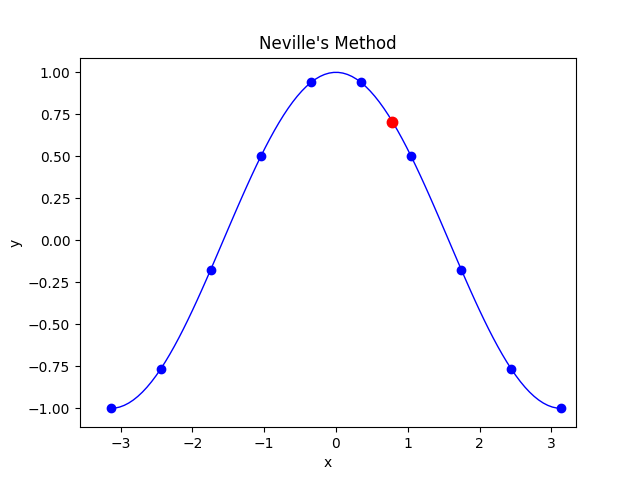

In [14]:
# Plot the results
  print(" ");
  print("Plottting the results.")
    
  plt.figure(1, facecolor='white');
  plt.clf();
  plt.plot(vec_x, vec_f, '.', linewidth=1.0, markersize=12, color='blue');
  xx = np.linspace(-math.pi,math.pi,int(1e2));  
  yy = np.cos(xx);
  plt.plot(xx, yy, '-', linewidth=1.0, markersize=12, color='blue');
  plt.plot(x, P_x, '.', markersize=15, color='red');
  plt.xlabel('x');
  plt.ylabel('y');
  plt.title("Neville's Method");
  plt.draw();

## Done